In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
# Features
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])

# Target
y = np.array([0, 1, 1, 0])

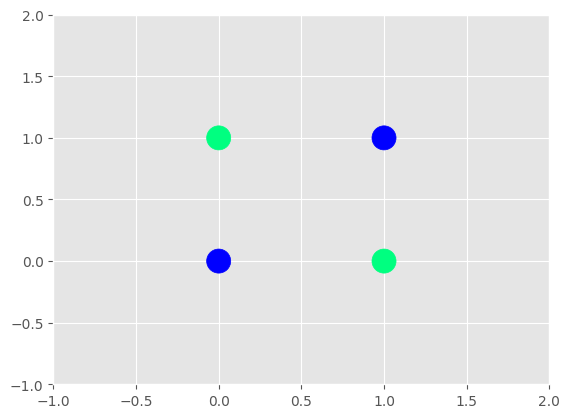

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=300, cmap='winter')
plt.ylim(-1,2)
plt.xlim(-1,2)
plt.show()

In [4]:
parameters = np.random.rand(3,3)
parameters

array([[0.40442026, 0.87350213, 0.1310762 ],
       [0.54887658, 0.93455779, 0.87250237],
       [0.51045923, 0.56217012, 0.20356468]])

In [6]:
# plotting the decision boundary
def plot(epoch):

  # node 1 (o_11)
  m1 = -(parameters[0][1]/parameters[0][2])
  c1 = -(parameters[0][0]/parameters[0][2])
  x_input1 = np.linspace(-3, 3, 100)
  y_input1 = m1 * x_input1 + c1

  # node 2 (o_12)
  m2 = -(parameters[1][1]/parameters[1][2])
  c2 = -(parameters[1][0]/parameters[1][2])
  x_input2 = np.linspace(-3, 3, 100)
  y_input2 = m2 * x_input2 + c2

  plt.figure(figsize=(8, 4))
  plt.plot(x_input1, y_input1, color='darkred', linewidth=3) # line created by o_11
  plt.plot(x_input2, y_input2, color='darkred', linewidth=3) # line created by o_12
  plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', s=200)
  plt.suptitle(f'epoch {epoch+1}')
  plt.ylim(-1, 2)
  plt.xlim(-1, 2)

  plt.show()

# Partie 2 Visualisation des frontières (exemple avec MLP et SVM RBF) XOR

Exemple de code avec Keras

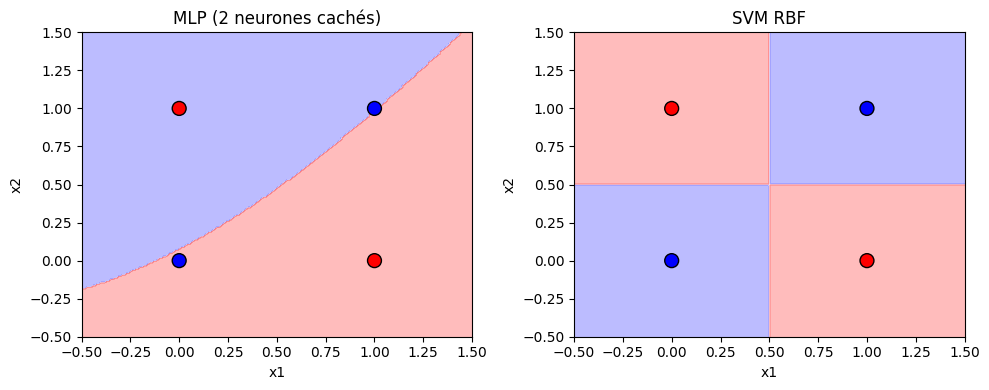

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Données XOR
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([0, 1, 1, 0])

# Modèles
mlp = MLPClassifier(hidden_layer_sizes=(2,), activation='tanh', max_iter=1000, random_state=42)
svm = SVC(kernel='rbf', C=10, gamma=1)

mlp.fit(X, y)
svm.fit(X, y)

# Grille pour visualisation
xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 200), np.linspace(-0.5, 1.5, 200))
grid = np.c_[xx.ravel(), yy.ravel()]

# Prédictions
Z_mlp = mlp.predict(grid).reshape(xx.shape)
Z_svm = svm.predict(grid).reshape(xx.shape)

# Tracé
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
titles = ['MLP (2 neurones cachés)', 'SVM RBF']

for ax, Z, title in zip(axes, [Z_mlp, Z_svm], titles):
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
    ax.scatter(X[:,0], X[:,1], c=y, edgecolor='k', cmap='bwr', s=100)
    ax.set_title(title)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(-0.5, 1.5)

plt.tight_layout()
plt.show()

Partie 3 SVM pour XOR

**SVM pour XOR**
Un SVM avec un noyau non linéaire peut également résoudre XOR. Le noyau projette les données dans un espace de redescription où elles deviennent linéairement séparables.
**Noyau polynomial**
Un noyau polynomial de degré 2 peut suffire. En effet, le XOR peut s'écrire comme x_1 x_2 (ET) combiné linéairement. Avec des caractéristiques polynomiales (par exemple x_1,x_2,x_1 x_2), les points deviennent séparables.
**Noyau RBF**
Le noyau RBF (gaussien) est également très efficace car il crée une mesure de similarité locale. En choisissant un gamma adapté, le SVM peut isoler chaque point et séparer les classes.


Exemple de code avec scikit-learn

Précision SVM RBF : 1.0
Précision SVM polynomial : 1.0


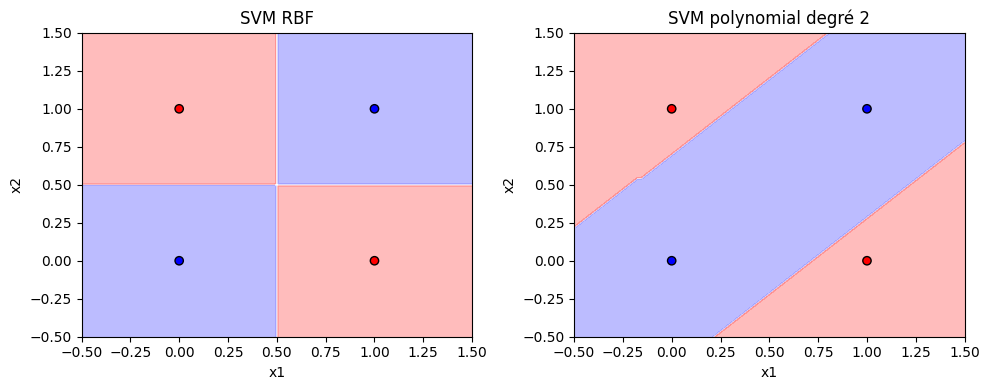

In [2]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([0, 1, 1, 0])

# SVM avec noyau RBF
svm_rbf = SVC(kernel='rbf', C=10, gamma=1)
svm_rbf.fit(X, y)
print("Précision SVM RBF :", svm_rbf.score(X, y))

# SVM avec noyau polynomial degré 2
svm_poly = SVC(kernel='poly', degree=2, C=10)
svm_poly.fit(X, y)
print("Précision SVM polynomial :", svm_poly.score(X, y))

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
for ax, model, title in zip(axes, [svm_rbf, svm_poly], ['SVM RBF', 'SVM polynomial degré 2']):
    xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 100), np.linspace(-0.5, 1.5, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
    ax.scatter(X[:,0], X[:,1], c=y, edgecolor='k', cmap='bwr')
    ax.set_title(title)
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
plt.tight_layout()
plt.show()


Visualisation des frontières (exemple avec MLP et SVM RBF)

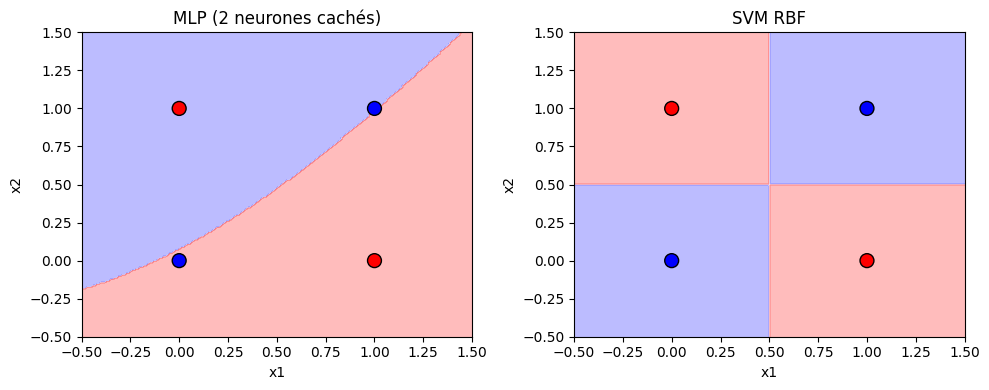

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Données XOR
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([0, 1, 1, 0])

# Modèles
mlp = MLPClassifier(hidden_layer_sizes=(2,), activation='tanh', max_iter=1000, random_state=42)
svm = SVC(kernel='rbf', C=10, gamma=1)

mlp.fit(X, y)
svm.fit(X, y)

# Grille pour visualisation
xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 200), np.linspace(-0.5, 1.5, 200))
grid = np.c_[xx.ravel(), yy.ravel()]

# Prédictions
Z_mlp = mlp.predict(grid).reshape(xx.shape)
Z_svm = svm.predict(grid).reshape(xx.shape)

# Tracé
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
titles = ['MLP (2 neurones cachés)', 'SVM RBF']

for ax, Z, title in zip(axes, [Z_mlp, Z_svm], titles):
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
    ax.scatter(X[:,0], X[:,1], c=y, edgecolor='k', cmap='bwr', s=100)
    ax.set_title(title)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(-0.5, 1.5)

plt.tight_layout()
plt.show()